In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scprep
from tqdm import tqdm
import os
import sys

sys.path.append('../src')
from models.unified_model import GeometricAE
from models.distance_matching import DistanceMatching
from data_script import hemisphere_data, sklearn_swiss_roll

/Users/danqiliao/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Data
data_name = 'swiss_roll'
if data_name == 'swiss_roll':
    gt_X, X, _ = sklearn_swiss_roll(n_samples=1000, noise=0.0)
    colors = None
elif data_name == 'hemisphere':
    gt_X, X, _ = hemisphere_data(n_samples=1000, noise=0.0)
    colors = None

print(gt_X.shape, X.shape)

(1000, 3) (1000, 3)


In [24]:
mode = 'encoder'
model_hypers = {
    'ambient_dimension': 3,
    'latent_dimension': 2,
    'model_type': 'distance',
    'activation': 'relu',
    'layer_widths': [256, 128, 64],
    'knn': 10,
    't': 30,
    'n_landmark': 5000,
    'verbose': False
}
training_hypers = {
    'data_name': f'{data_name}',
    'mode': mode, # 'encoder', 'decoder', 'end2end', 'separate
    'max_epochs': 10,
    'batch_size': 64,
    'lr': 1e-3,
    'shuffle': True,
    'componentwise_std': False,
    'weight_decay': 1e-5,
    'dist_mse_decay': 1e-5,
    'monitor': 'validation/loss',
    'patience': 100,
    'seed': 2024,
    'log_every_n_steps': 100,
    'accelerator': 'auto',
    'train_from_scratch': True,
    'model_save_path': f'./{data_name}_distance_matching_{mode}/model'
}

model = DistanceMatching(**model_hypers)
model.fit(X, train_mask=None, percent_test=0.2, **training_hypers)

Calculating PHATE...
  Running PHATE on 1000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.15 seconds.
  Calculating metric MDS...


/Users/danqiliao/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 2.52 seconds.
Calculated PHATE in 2.72 seconds.


/Users/danqiliao/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'preprocessor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['preprocessor'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/danqiliao/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /Users/danqiliao/Desktop/dmae/notebooks/swiss_roll_distance_matching_encoder exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name         | Type         | Params
----------------------------------------------
0 | preprocessor | Preprocessor | 0     
1 | mlp          | MLP          | 42.3 K
----

Fitting model ... {'dimensions': {'data': 3, 'latent': 2}, 'encoder': {'layer_widths': [256, 128, 64], 'activation': 'relu', 'batch_norm': False, 'dropout': 0.0}, 'decoder': {'layer_widths': [64, 128, 256], 'activation': 'relu', 'batch_norm': False, 'dropout': 0.0}, 'loss': {'dist_mse_decay': 1e-05, 'weights': {'dist': 0.9, 'reconstr': 0.1, 'cycle': 0.0, 'cycle_dist': 0.0}}, 'training': {'mode': 'encoder', 'max_epochs': 10, 'accelerator': 'auto', 'lr': 0.001, 'weight_decay': 1e-05, 'dist_mse_decay': 1e-05, 'monitor': 'validation/loss', 'patience': 100, 'log_every_n_steps': 100}, 'logger': {'use_wandb': False}, 'path': {'root': './swiss_roll_distance_matching_encoder', 'model': 'model', 'log': 'mylogs'}}
                                                                            

/Users/danqiliao/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
/Users/danqiliao/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/danqiliao/opt/miniconda3/envs/yale529/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing 

Epoch 9: 100%|██████████| 800/800 [00:05<00:00, 136.87it/s, loss=0.077, v_num=2, train/loss_step=0.0871, validation/loss=0.0873, train/loss_epoch=0.0821] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 800/800 [00:05<00:00, 136.79it/s, loss=0.077, v_num=2, train/loss_step=0.0871, validation/loss=0.0873, train/loss_epoch=0.0821]
Done fitting model.


In [25]:
Z = model.encode(torch.Tensor(X))
print('Encoded Z:', Z.shape)
X_hat = model.decode(Z)
print('Decoded X:', X_hat.shape)

Encoded Z: torch.Size([1000, 2])
Decoded X: torch.Size([1000, 3])


<Axes3D: title={'center': 'Original'}>

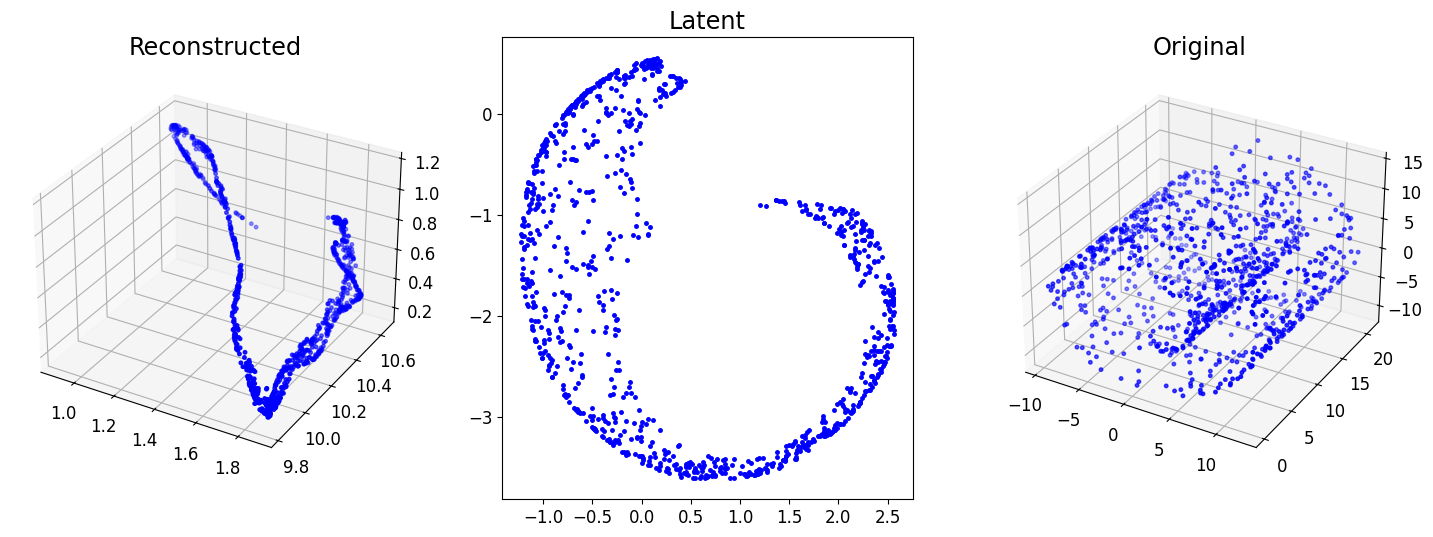

In [26]:
# Visualize
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(131, projection='3d')
scprep.plot.scatter3d(X_hat.detach().numpy(), c='b', title='Reconstructed', ax=ax)

if Z.shape[-1] < 3:
    ax = fig.add_subplot(132)
    scprep.plot.scatter2d(Z.detach().numpy(), c='b', title='Latent', ax=ax)
else:
    ax = fig.add_subplot(132, projection='3d')
    scprep.plot.scatter3d(Z.detach().numpy(), c='b', title='Latent', ax=ax)

ax = fig.add_subplot(133, projection='3d')
scprep.plot.scatter3d(X, c='b', title='Original', ax=ax)

In [27]:
metric = model.encoder_pullback(torch.Tensor(X))
print('Encoder Pullback:', metric.shape)

Encoder Pullback: torch.Size([1000, 3, 3])


In [ ]:
class CurveNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, x0, x1, variance = 0.15 ):
        super().__init__()
        self.mod = nn.Sequential(nn.Linear(1,hidden_dim),
                    nn.Tanh(),
                    nn.Linear(hidden_dim,hidden_dim),
                    nn.Tanh(),
                    nn.Linear(hidden_dim,hidden_dim),
                    nn.Tanh(),
                    nn.Linear(hidden_dim,input_dim + 1))
        self.x0 = x0
        self.x1 = x1
        self.variance = variance
        self.input_dim = input_dim
    def forward(self, t):
    
        mu = t * self.x1 + (1-t) * self.x0
        
        enveloppe = self.variance * (1- (t*2-1)**2) * self.mod(t)[:, self.input_dim].reshape(-1, 1)
        outs =  self.mod(t)[:,:self.input_dim] * enveloppe + mu

        return outs

# randomly pick a pair of points
batch_x0 = torch.Tensor(X[np.random.choice(X.shape[0], 1)])
batch_x1 = torch.Tensor(X[np.random.choice(X.shape[0], 1)])

print('Batch X0:', batch_x0.shape)
print('Batch X1:', batch_x1.shape)

curve = CurveNet(input_dim=X.shape[1], hidden_dim=32, x0=batch_x0, x1=batch_x1, variance=0.15)
optimizer = torch.optim.Adam(curve.parameters(), lr=0.001)

In [ ]:
print(batch_x0)
print(batch_x1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(X, c='b', title='Training Data', ax=ax)
scprep.plot.scatter3d(batch_x0, c='r', ax=ax)
scprep.plot.scatter3d(batch_x1, c='r', ax=ax)


In [ ]:
def density_loss(outs, data, topk=5):
    '''
    Args:
        outs: shape (T, D)
        data: shape (N, D)
    Returns:
        l_density: shape (T,)
    '''
    if isinstance(data, np.ndarray):
        data = torch.Tensor(data)

    # pairwise distances
    dist = torch.cdist(outs, data) # [T, N]
    # closest topk distances
    topk_dist, _ = torch.topk(dist, topk, dim=1,largest=False) # [T, k]
    avg_topk = torch.mean(topk_dist, dim=1)

    l_density = avg_topk

    return l_density
    



t = torch.linspace(0, 1, 100).view(-1,1)
losses = []
density_lambda = 1.0
for _ in tqdm(range(500)):

    optimizer.zero_grad()

    #jac = torch.autograd.functional.jacobian(curve.forward, t, create_graph=True)
    jac = torch.autograd.functional.jacobian(curve.forward, t, create_graph=True)
    #print('jac: ', jac.shape)
    #print('jac = torch.einsum("tntd->tnd",jac)', torch.einsum("tntd->tnd",jac).shape)
    jac = torch.einsum("tntd->tnd",jac)[...,0]
    #print('jac.shape', jac.shape)

    out = curve(t)
        
    #m = metric(out)
    out_ = torch.Tensor(out.cpu().detach().numpy())
    m = model.encoder_pullback(out_)

    pre_prod = torch.einsum('tb,tbj->tj',jac,m)
    prod = torch.einsum('tb,tb->t', pre_prod, jac)

    # density loss
    l_density = density_loss(out, X).mean()
    ratio = np.floor(prod.mean().item() / l_density.item()) * 0.5

    #print('density_loss: ', l_density.item(), 'length loss: ', prod.mean().item())


    loss = prod.mean() +  l_density * ratio 
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().numpy())

In [ ]:
# Visualize
t = torch.linspace(0, 1, 1000).view(-1,1)
pred_geodesic = curve(t).detach().numpy()
print('Pred Geodesic:', pred_geodesic.shape)

In [ ]:
# Visualize pred geodesic on the ambient space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(X, c='gray', title='Reconstructed', ax=ax, alpha=0.5)
# start and end points
scprep.plot.rotate_scatter3d(batch_x0, c='g', ax=ax)
scprep.plot.rotate_scatter3d(batch_x1, c='r', ax=ax)
scprep.plot.rotate_scatter3d(pred_geodesic, c='b', title='Pred Geodesic', ax=ax)